<a href="https://colab.research.google.com/github/DanyaFire/StatPrac/blob/main/DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1:** Задержки по дням недели - Перегрузка аэропорта в определенные дни.

Описание: Анализ распределения задержек рейсов по дням недели, для выявления возможных закономерностей, связанных с загруженностью аэропорта.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:

ar = pd.read_csv('/content/airlines.csv', low_memory=False)
ar.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [48]:
air = pd.read_csv('/content/airports.csv', low_memory=False)
air.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [56]:
# 1. Определение процента пропущенных значений в каждом столбце
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Процент пропущенных значений в каждом столбце:")
print(missing_percent)

# 2. Удаление столбцов, где процент пропущенных значений превышает порог (например, 50%)
threshold = 50  # Порог для удаления столбцов (в процентах)
columns_to_drop = missing_percent[missing_percent > threshold].index
df_cl = df.drop(columns=columns_to_drop)


# 4. Проверка данных после удаления
print("\nДанные после удаления столбцов с пропущенными значениями:")

df_cl.head()

Процент пропущенных значений в каждом столбце:
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252649
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.478483
DEPARTURE_DELAY         1.478483
TAXI_OUT                1.528145
WHEELS_OFF              1.528145
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.803232
AIR_TIME                1.803232
DISTANCE                0.000000
WHEELS_ON               1.587602
TAXI_IN                 1.587602
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.587602
ARRIVAL_DELAY           1.803232
DIVERTED                0.000000
CANCELLED               0.000017
CANCELLATION_REASON    98.457497
AIR_SYSTEM_DELAY       81.741343
SECURITY_DELAY         81.741343
AIRLINE_DELAY          81.741

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0


In [50]:
day_delay = df_cl.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
day_delay

,DEPARTURE_DELAY
DAY_OF_WEEK,
1,10.775637
2,9.164522
3,8.645277
4,9.956913
5,9.429768
6,7.827416
7,9.402225


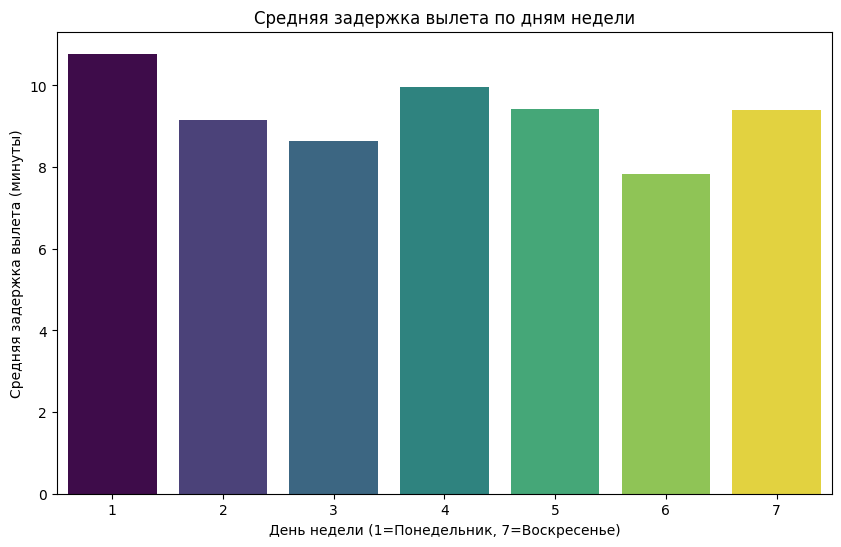

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x = day_delay.index, y = day_delay.values, hue = day_delay.index, palette = "viridis", legend = False)
plt.xlabel("День недели (1=Понедельник, 7=Воскресенье)")
plt.ylabel("Средняя задержка вылета (минуты)")
plt.title("Средняя задержка вылета по дням недели")
plt.show()

Наибольшие задержки наблюдаются в понедельник. Это совпадает с пиком объема рейсов и, возможно, количества пассажиров, что говорит о том, что аэропорты испытывают трудности с обработкой возросшей нагрузки в эти дни.

**Задача 2:** Задержки по авиакомпаниям - Операционная неэффективность определенных перевозчиков.

Описание: Исследование средних задержек по авиакомпаниям, с целью выявить перевозчиков с постоянно более высокими показателями задержек.

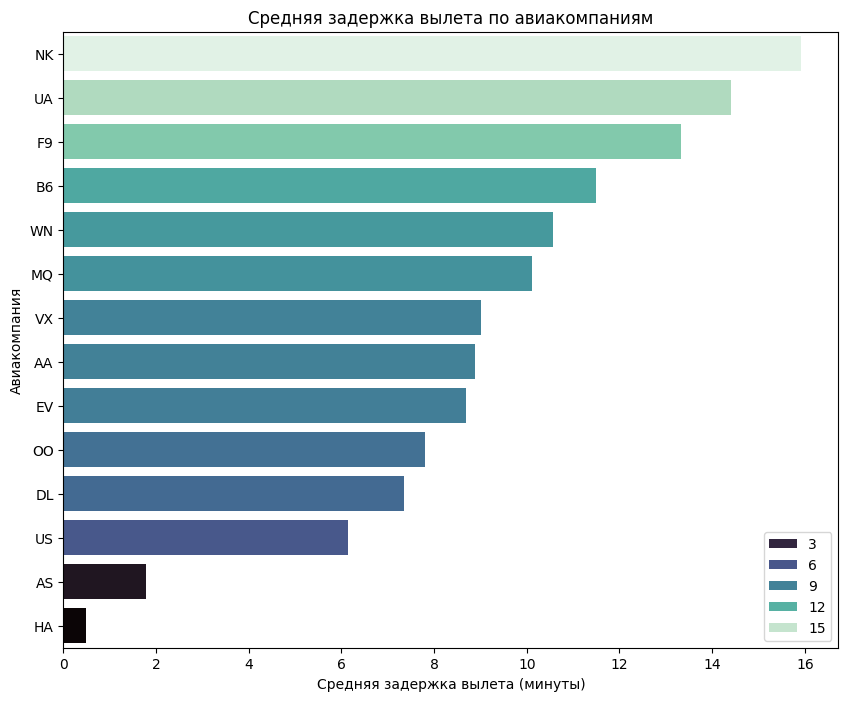

Средняя задержка вылета по авиакомпаниям:
 AIRLINE
NK    15.928373
UA    14.417181
F9    13.330916
B6    11.501221
WN    10.568034
MQ    10.113256
VX     9.015545
AA     8.888108
EV     8.698654
OO     7.794991
DL     7.360323
US     6.141137
AS     1.782478
HA     0.483030
Name: DEPARTURE_DELAY, dtype: float64

Медианная задержка вылета по авиакомпаниям:
 AIRLINE
UA    1.0
WN    0.0
VX   -1.0
NK   -1.0
DL   -1.0
AA   -2.0
MQ   -2.0
US   -2.0
B6   -2.0
F9   -2.0
OO   -3.0
EV   -3.0
AS   -4.0
HA   -4.0
Name: DEPARTURE_DELAY, dtype: float64


In [52]:
delay_by_airline = df_cl.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x = delay_by_airline.values, y = delay_by_airline.index, hue = delay_by_airline.values, palette="mako")
plt.xlabel("Средняя задержка вылета (минуты)")
plt.ylabel("Авиакомпания")
plt.title("Средняя задержка вылета по авиакомпаниям")
plt.show()

# Медианную задержку по авиакомпаниям
median_delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].median().sort_values(ascending=False)

print("Средняя задержка вылета по авиакомпаниям:\n", delay_by_airline)
print("\nМедианная задержка вылета по авиакомпаниям:\n", median_delay_by_airline)

Определенные авиакомпании демонстрируют значительно более высокие средние и медианные задержки вылета, чем другие. Большая разница между средней и медианной задержкой для некоторых авиакомпаний предполагает наличие экстремальных задержек-выбросов, которые сильно влияют на среднее значение и требуют дальнейшего изучения.

**Задача 3:** Задержки по аэропортам - Недостатки инфраструктуры и загруженность.

Описание: Анализ задержки вылета на основе аэропорта отправления, чтобы выявить аэропорты с недостатками. Найдём топ 10 самых проблемных аэропортов.

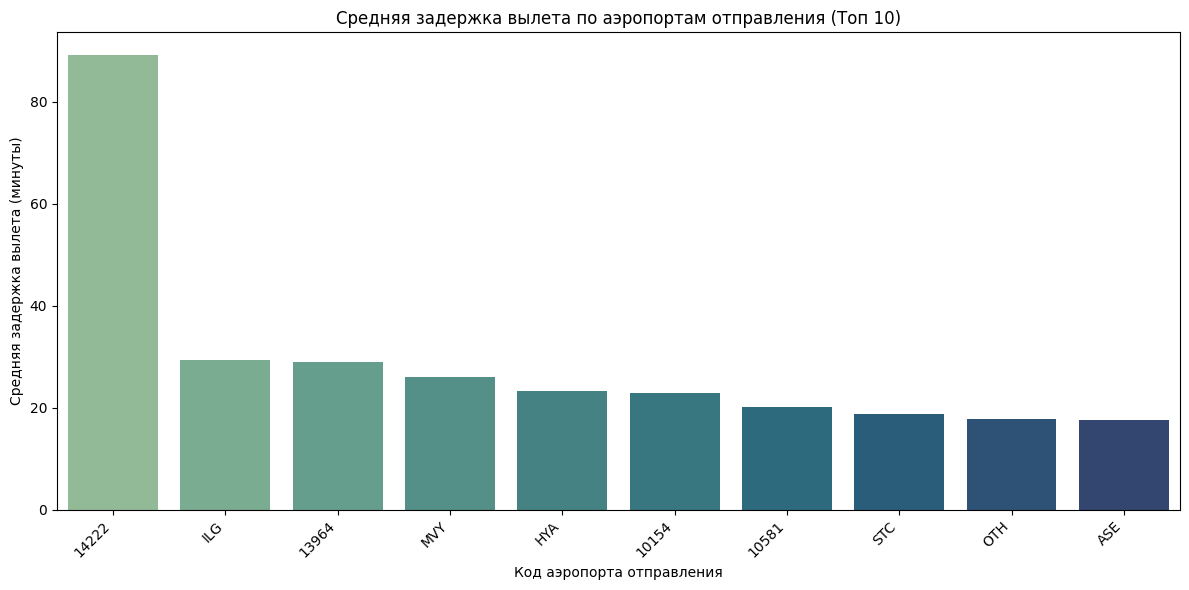

In [53]:
delay_by_origin = df_cl.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = delay_by_origin.index, y = delay_by_origin.values, hue = delay_by_origin.index, palette="crest")
plt.xlabel("Код аэропорта отправления")
plt.ylabel("Средняя задержка вылета (минуты)")
plt.title("Средняя задержка вылета по аэропортам отправления (Топ 10)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

В нескольких аэропортах отправления постоянно наблюдаются значительно более высокие задержки вылета. Это указывает на потенциальные недостатки инфраструктуры или недостаточное количество персонала.

**Задача 5:** Влияние времени суток на задержки

Описание: Изучение взаимосвязь между временем суток и задержкой вылета, чтобы оценить влияние почасовой загруженности.

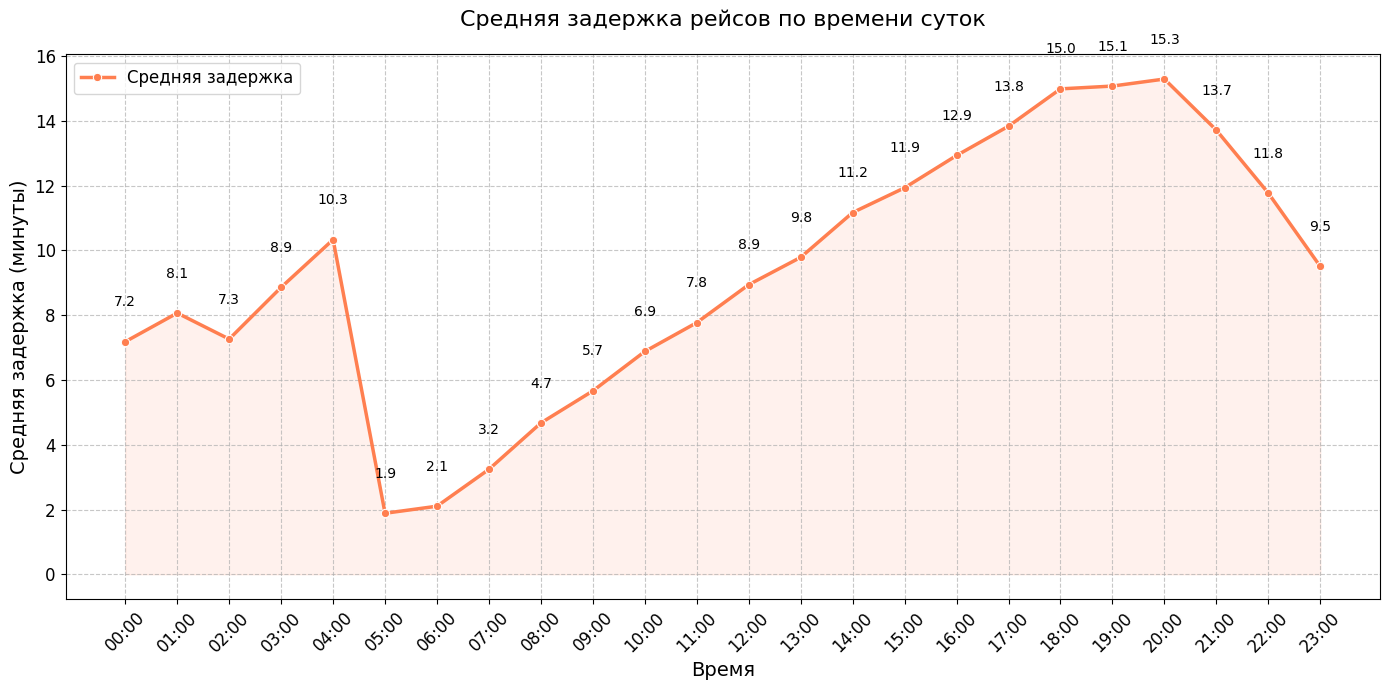

In [62]:
# Преобразование времени вылета в часы
df_cl['HOUR'] = df_cl['SCHEDULED_DEPARTURE'] // 100

# Группировка по часам и расчет среднего времени задержки
delay_by_hour = df_cl.groupby('HOUR')['DEPARTURE_DELAY'].mean()

# Визуализация
plt.figure(figsize=(14, 7))
sns.lineplot(x=delay_by_hour.index, y=delay_by_hour.values, marker='o', color='coral', linewidth=2.5, label='Средняя задержка')
plt.fill_between(delay_by_hour.index, delay_by_hour.values, color='coral', alpha=0.1)  # Заливка под линией

# Добавляем подписи к точкам
for hour, delay in zip(delay_by_hour.index, delay_by_hour.values):
    plt.text(hour, delay + 1, f'{delay:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Средняя задержка рейсов по времени суток', fontsize=16, pad=20)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Средняя задержка (минуты)', fontsize=14)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45, fontsize=12)  # Подписи в формате "ЧЧ:00"
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()  # Улучшение компоновки
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Задержки увеличиваются в утренние часы (5-6 утра) и вечером (20-00 часов). Это связано с пиковой нагрузкой на аэропорты в эти периоды.

**Задача 5:** Влияние погоды на задержки рейсов.

Описание: Анализ задержек, связанных с погодными условиями, чтобы оценить эффективность существующих протоколов, связанных с погодой.


Средняя задержка вылета по месяцам:
MONTH
1      9.759471
2     11.885284
3      9.660903
4      7.721885
5      9.454144
6     13.986016
7     11.394664
8      9.932045
9      4.780116
10     4.982661
11     6.944197
12    11.783529
Name: DEPARTURE_DELAY, dtype: float64


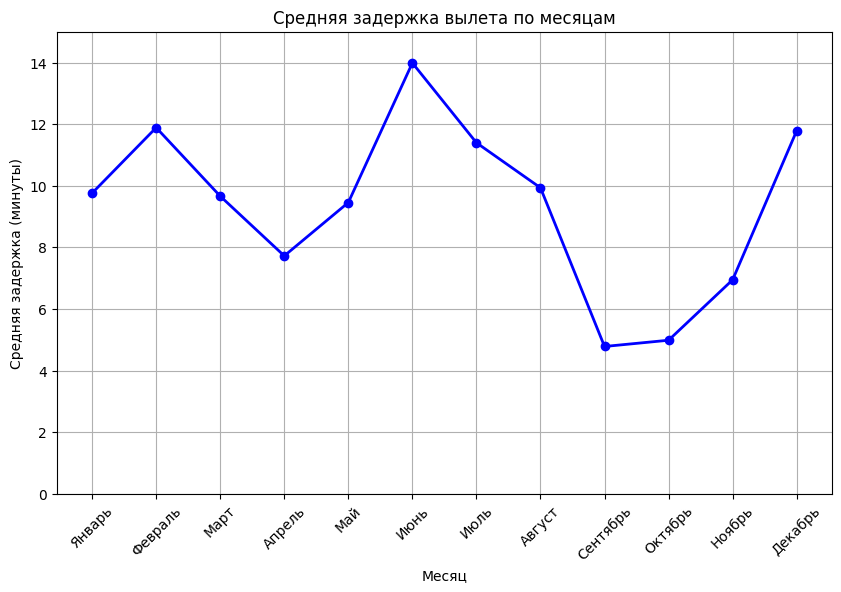

In [55]:
# Группировка по месяцам и расчет средней задержки вылета
delay_by_month = df_cl.groupby('MONTH')['DEPARTURE_DELAY'].mean()
print("\nСредняя задержка вылета по месяцам:")
print(delay_by_month)

# Создаем список с названиями месяцев для подписей на графике
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(delay_by_month.index, delay_by_month.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13), months, rotation=45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

Задержки, связанные с погодными условиями, демонстрируют сезонный характер. Может потребоваться дальнейшее изучение эффективности существующих протоколов, связанных с погодой, и инвестиции в технологии для улучшения прогнозирования погоды и принятия решений.